In [1]:
import pickle

def loadCNN():
	file = open("./CNNArticles",'rb')
	articles = pickle.load(file)
	file = open("./CNNGold",'rb')
	abstracts = pickle.load(file)

	articlesCl = []  
	for article in articles:
		articlesCl.append(article.replace("”", "").rstrip("\n"))
	articles = articlesCl
	  
	articlesCl = []  
	for article in abstracts:
		articlesCl.append(article.replace("”", "").rstrip("\n"))
	abstracts = articlesCl
    
	return articles, abstracts

articles, abstracts = loadCNN()

print("ARTICLE=",articles[0])
print("SUMMARY=",abstracts[0])

ARTICLE= turkey has blocked access to twitter and youtube after they refused a request to remove pictures of a prosecutor held during an armed siege last week . a turkish court imposed the blocks because images of the deadly siege were being shared on social media and ` deeply upset ' the wife and children of mehmet selim kiraz , the hostage who was killed . the 46-year-old turkish prosecutor died in hospital when members of the revolutionary people 's liberation party-front ( dhkp-c ) stormed a courthouse and took him hostage . the dhkp-c is considered a terrorist group by turkey , the european union and us . a turkish court has blocked access to twitter and youtube after they refused a request to remove pictures of prosecutor mehmet selim kiraz held during an armed siege last week grief : the family of mehmet selim kiraz grieve over his coffin during his funeral at eyup sultan mosque in istanbul , turkey . he died in hospital after he was taken hostage by the far-left organisation tw

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [12]:
# Prendre les 100 premiers documents et résumés
documents_sample = articles[:100]
summaries_sample = abstracts[:100]

In [13]:
# Vectorisation des documents et des résumés
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
document_matrix = vectorizer.fit_transform(documents_sample)
summary_matrix = vectorizer.transform(summaries_sample)

document_matrix.shape, summary_matrix.shape

((100, 5000), (100, 5000))

In [5]:
# Fonction pour récupérer les documents les plus similaires pour chaque résumé
def retrieve_documents(summary_matrix, document_matrix, top_n=1):
    # Calculer la similarité cosinus entre le résumé et tous les documents
    cosine_similarities = cosine_similarity(summary_matrix, document_matrix)
    
    # Récupérer les indices des documents les plus similaires pour chaque résumé
    top_indices = np.argsort(cosine_similarities, axis=1)[:, -top_n:]
    
    return top_indices

# Récupérer les documents les plus similaires pour les 100 résumés
top_indices_100 = retrieve_documents(summary_matrix, document_matrix, top_n=1)

# Vérifier combien de fois le document associé au résumé est correctement retrouvé
correct_matches = np.sum(top_indices_100.flatten() == np.arange(100))

correct_matches

100

Le système de récupération d'informations a parfaitement fonctionné pour les 100 résumés : pour chaque résumé, le document associé a été correctement identifié comme le plus similaire.

In [6]:
from sklearn.manifold import TSNE

# Combinez les embeddings des documents et des résumés pour une réduction de dimensionnalité conjointe
combined_matrix = np.vstack([document_matrix.toarray(), summary_matrix.toarray()])

# Utilisez t-SNE pour réduire la dimensionnalité à 2D
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
low_dimensional_embeddings = tsne_model.fit_transform(combined_matrix)

# Séparez les embeddings réduits des documents et des résumés pour la visualisation
document_embeddings_2d = low_dimensional_embeddings[:100]
summary_embeddings_2d = low_dimensional_embeddings[100:]

document_embeddings_2d.shape, summary_embeddings_2d.shape


((100, 2), (100, 2))

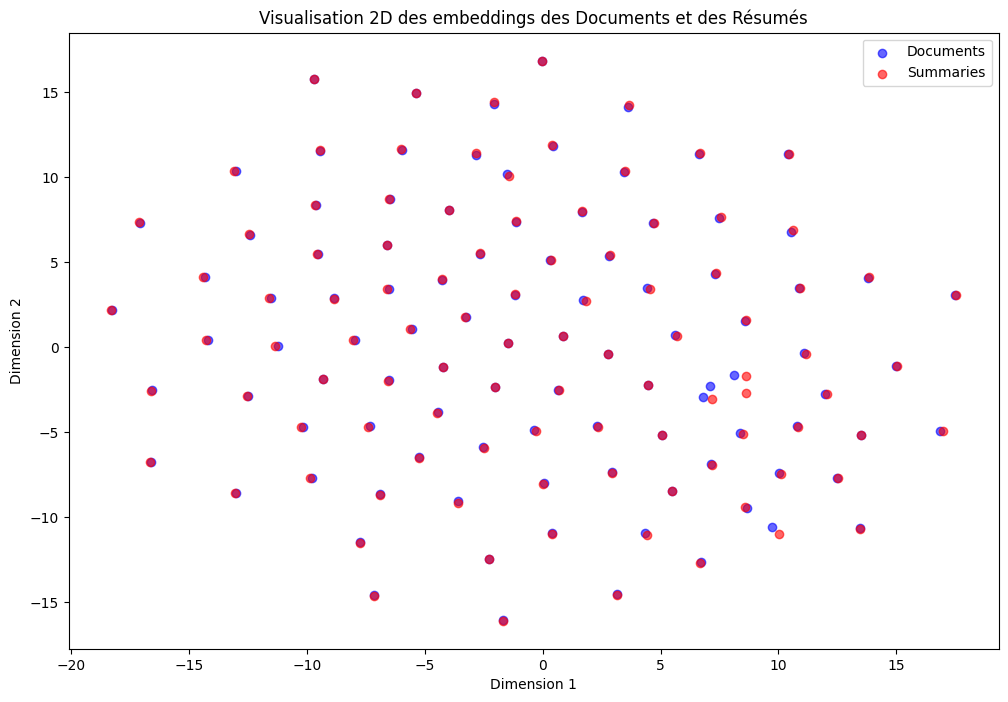

In [10]:
import matplotlib.pyplot as plt

# Initialiser le graphique
plt.figure(figsize=(12, 8))

# Visualiser les embeddings des documents
plt.scatter(document_embeddings_2d[:, 0], document_embeddings_2d[:, 1], c='blue', label='Documents', alpha=0.6)
# Visualiser les embeddings des résumés
plt.scatter(summary_embeddings_2d[:, 0], summary_embeddings_2d[:, 1], c='red', label='Summaries', alpha=0.6)

# Ajouter une légende et un titre
plt.legend(loc='upper right')
plt.title('Visualisation 2D des embeddings des Documents et des Résumés')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Afficher le graphique
plt.show()

Comme on peut le voir, la plupart des points rouges (résumés) sont proches de certains points bleus (documents). Cela indique que les résumés et leurs documents correspondants ont des embeddings similaires, ce qui est conforme à nos attentes. Cette proximité reflète la similarité sémantique entre un document et son résumé.

On va proceder pour un plus grand nombre et pas 100

In [15]:
# Vectorisation des documents et des résumés
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
document_matrix_2 = vectorizer.fit_transform(articles)
summary_matrix_2 = vectorizer.transform(abstracts)

document_matrix_2.shape, summary_matrix_2.shape

((11489, 5000), (11489, 5000))

In [16]:
# Récupérer les documents les plus similaires pour les 100 résumés
top_indices = retrieve_documents(summary_matrix_2, document_matrix_2, top_n=1)

# Vérifier combien de fois le document associé au résumé est correctement retrouvé
correct_matches = np.sum(top_indices.flatten() == np.arange(11489))

correct_matches

9221

In [17]:
from sklearn.manifold import TSNE

# Combinez les embeddings des documents et des résumés pour une réduction de dimensionnalité conjointe
combined_matrix_2 = np.vstack([document_matrix_2.toarray(), summary_matrix_2.toarray()])

# Utilisez t-SNE pour réduire la dimensionnalité à 2D
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
low_dimensional_embeddings = tsne_model.fit_transform(combined_matrix_2)

# Séparez les embeddings réduits des documents et des résumés pour la visualisation
document_embeddings_2d_2 = low_dimensional_embeddings[:11489]
summary_embeddings_2d_2 = low_dimensional_embeddings[11489:]

document_embeddings_2d_2.shape, summary_embeddings_2d_2.shape


((11489, 2), (11489, 2))

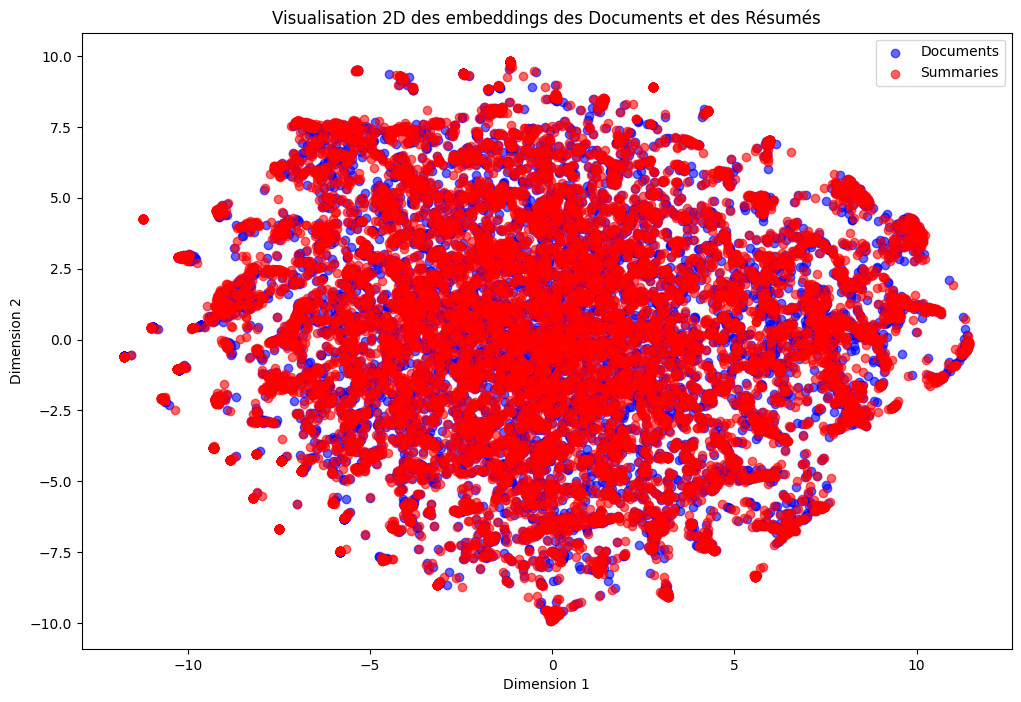

: 

In [18]:
# Initialiser le graphique
plt.figure(figsize=(12, 8))

# Visualiser les embeddings des documents
plt.scatter(document_embeddings_2d_2[:, 0], document_embeddings_2d_2[:, 1], c='blue', label='Documents', alpha=0.6)
# Visualiser les embeddings des résumés
plt.scatter(summary_embeddings_2d_2[:, 0], summary_embeddings_2d_2[:, 1], c='red', label='Summaries', alpha=0.6)

# Ajouter une légende et un titre
plt.legend(loc='upper right')
plt.title('Visualisation 2D des embeddings des Documents et des Résumés')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Afficher le graphique
plt.show()